# Laboratorio 2 - Analisis de datos

## Part 1 Numpy

In [3]:
import numpy as np
import sys

1. ¿Cuál es el tamaño en bytes de un array de 1000  
elementos de tipo booleano?

In [5]:
bool_array = np.full(1000, True)
size_bytes = sys.getsizeof(bool_array)
print(f"Size of array in bytes: {size_bytes}")

Size of array in bytes: 1112


2.  Cree un array cuyos elementos sean los enteros pares en 
[1,100] y en orden decreciente. Muestre los 10 últimos 
por pantalla.

In [7]:
enteros_array = np.arange(2, 101, 2)
enteros_array = -np.sort(-enteros_array)
print(enteros_array[-10:])

[20 18 16 14 12 10  8  6  4  2]


3. Dado el array:
| 2 | 4 | 5 | 6 |
|---|---|---|---|
| 0 | 3 | 7 | 4 |
| 8 | 8 | 5 | 2 |
| 1 | 5 | 1 | 6 |

Seleccione con una instruccion el subarray de elementos.
| 0 | 3 | 7 | 4 |
|---|---|---|---|
 1 |420    |

In [9]:
array_matrix = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 1, 6]])
print(array_matrix[1, 0:4])

[0 3 7 4]


Despues, seleccione el subarray de elementos.
| 2 | 5 |
|---|---|
| 8 | 5 |

In [11]:
print(array_matrix[[0, 2], :][:, [0, 2]])

[[2 5]
 [8 5]]


4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], 
obtenga la media aritmética de la diferencia (a-b).

In [13]:
array_a = np.array([1, 4, 2, 7])
array_b = np.array([1, 3, 2, 9])
array_c = array_a - array_b
print(array_c.mean())

-0.25


5. Tengo valores de cordenadas (x, y) en las columnas 
del arra.
 | 1.33 | 4.5  |
|------|------|
| 30.0 | 10.7 |
| 70.2 | 0.5  |0.5 
 
Agregue a este array las coordenadas (37.1, -3.6). 
Muestre en pantalla las dimensiones del nuevo 
array.

In [15]:
coordinates = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
new_coordinates = np.array([37.1, -3.6])
coordinates = np.vstack([coordinates, new_coordinates])

print(f"Dimensiones del nuevo array: {coordinates.shape} \n")
print(coordinates)

Dimensiones del nuevo array: (4, 2) 

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


6.  Copie el array del ejercicio anterior. Traspóngalo (. 
Agregue ahora dos nuevos pares de coordenadas: (10.8, 
3.0) y (35.8, 12.0).

In [17]:
coordinates_transposed = coordinates.transpose()
coordinates_transposed = np.hstack([coordinates_transposed, [[10.8, 3.0], [35.8, 12.0]]])
print(coordinates_transposed)

[[ 1.33 30.   70.2  37.1  10.8   3.  ]
 [ 4.5  10.7   0.5  -3.6  35.8  12.  ]]


## Part 2 Exploracion y Mineria de Datos

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
dataset = pd.read_csv("NucleosPoblacion.csv")

In [20]:
dataset.shape

(852, 10)

In [21]:
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1. ¿Cuántos Municipios tienen mas de 100000 
habitantes?

In [23]:
poblacion = np.sum(dataset["Poblacion"] > 100000)
print(f"Candidad de municipios con mas de 100,000 habitantes: {poblacion}")

Candidad de municipios con mas de 100,000 habitantes: 62


2. Realice una gráfica de barras sobre la población de cada 
ciudad, ordenela de menor a mayro

In [25]:
sorted_dataset = dataset.sort_values(by="Poblacion")
# Dataframe reduced for graph legibility
reduced_dataset = sorted_dataset.nlargest(20, "Poblacion")
reduced_dataset = reduced_dataset.sort_values(by="Poblacion")

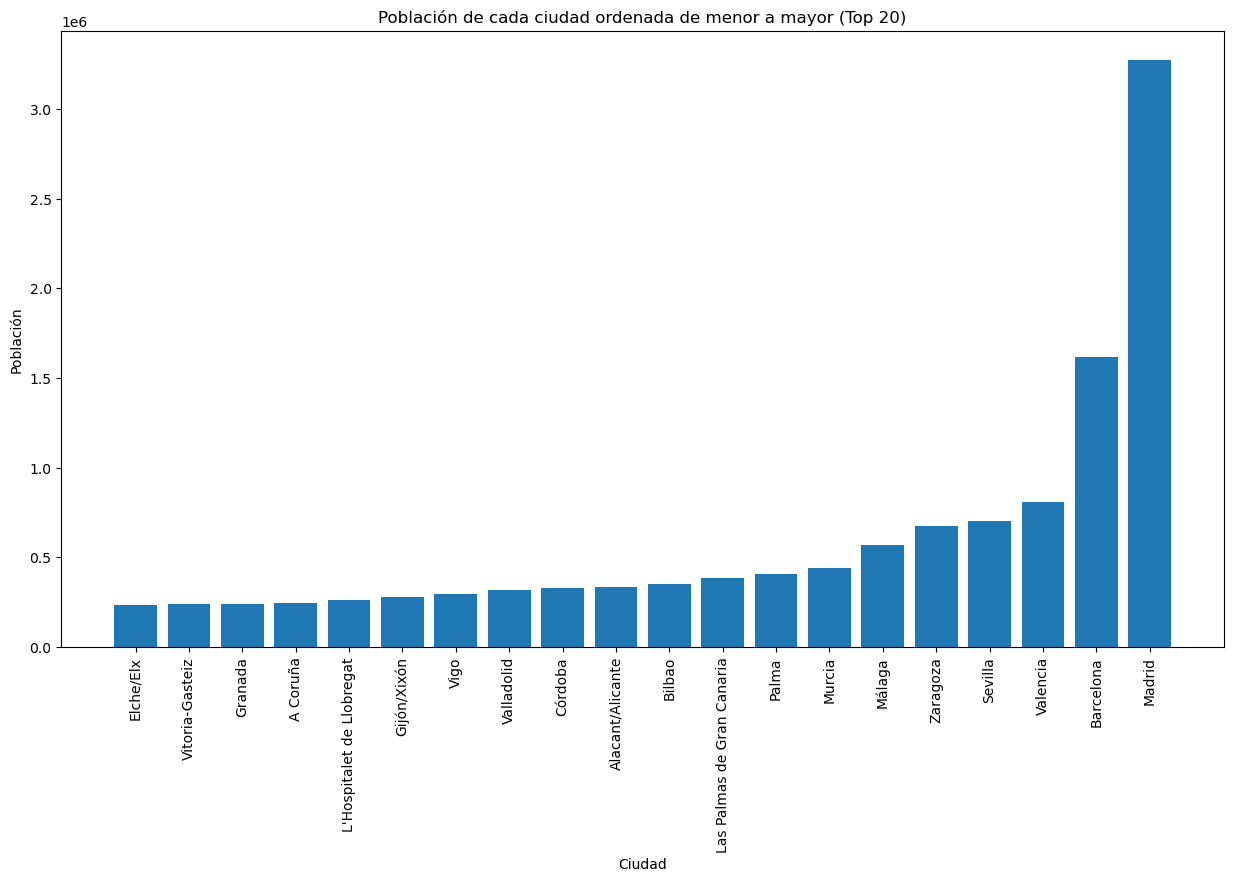

In [26]:
plt.figure(figsize=(15, 8))
plt.bar(reduced_dataset["Texto"], reduced_dataset["Poblacion"])
plt.xticks(rotation=90)
plt.xlabel("Ciudad")
plt.ylabel("Población")
plt.title(f"Población de cada ciudad ordenada de menor a mayor (Top {len(reduced_dataset.index)})")
plt.show()

a. ¿Cual es la segunda ciudad mas poblada? 
**Barcelona**

b. Que posicion ocupa Granada en el ranking de las ciudades mas pobladas? **18**?

3. Cuantos municipios de la provincia de Tarragona tienen 
aás de 32,000 habitantes?

In [29]:
tarragona = dataset.loc[dataset["Provincia"] == "Tarragona"]
tarragona = np.sum(dataset["Poblacion"] > 32000)
print(f"Candidad de municipios con mas de 32,000 habitantes en Tarragona: {tarragona}")

Candidad de municipios con mas de 32,000 habitantes en Tarragona: 238


4. Cual es el municipio situado mas al norte?

In [31]:
northest = dataset.nlargest(1, columns=['Y'])
print(f"Municipio: {northest['Municipio'].iloc[0]}")
print(f"Provincia: {northest['Provincia'].iloc[0]}")
print(f"Poblacion: {northest['Poblacion'].iloc[0]}")

Municipio: Viveiro
Provincia: Lugo
Poblacion: 16211.0


5. Obtenga la media, mediana, desviacion estandar, valor 
aáximo y valor iínimo de la poblacoón de los municipios
de la provincia de Granada.

In [33]:
granada = dataset.loc[dataset["Provincia"] == "Granada"]

mean = granada["Poblacion"].mean()
median = granada["Poblacion"].median()
standar_deviation = granada["Poblacion"].std()
max = granada["Poblacion"].max()
min = granada["Poblacion"].min()

print(f"Media: {mean}")
print(f"Mediana: {median}")
print(f"Desviacin estandar: {standar_deviation}")
print(f"Maximo: {max}")
print(f"Minimo: {min}")

Media: 30217.85
Mediana: 17526.0
Desviacin estandar: 50355.49171459277
Maximo: 239154.0
Minimo: 10386.0


6.  Realice un histograma con la poblacion de los 
Municipios para cada una de las provincias.

In [ ]:
provincias = dataset["Provincia"].unique()
num_provincias = len(provincias)

plt.figure(figsize=(15, 66))

cols = 4
rows = math.ceil(num_provincias / cols)

for i, provincia in enumerate(provincias, 1):
    plt.subplot(rows, cols, i)
    data = dataset[dataset["Provincia"] == provincia]
    plt.hist(data["Poblacion"], color='teal', density=True, bins=30, edgecolor="black")
    plt.title(provincia)
    plt.xlabel("Población")

plt.show()

7. Seleccione al azar cincuenta municipios diferentes de 
entre los diponibles en el archivo. Aseuúrese de que no
se repitan ¿Luego calcule el promedio de la poblaoión  
la desvioción astándar de esto 50 municipis?.

In [143]:
municipios = dataset["Municipio"].unique()
municipios = np.random.choice(municipios, size=50, replace=False)
municipios = dataset[dataset["Municipio"].isin(municipios)]

promedio = municipios["Poblacion"].mean()
std = municipios["Poblacion"].std()

print(f"Promedio: {promedio}.")
print(f"Desviacion estandar: {std}.")

Promedio: 37914.03636363636.
Desviacion estandar: 53213.47284286803.


8. Muestre los nombres de los Municipios mas cercano y mas 
lejano a Madrid.

In [183]:
dataset_minus_madrid = dataset[dataset["Municipio"] != "Madrid"].copy()
coord_x_madrid = 40.4167
coord_y_madrid = -3.7033

dataset_minus_madrid["Distancia_a_Madrid"] = np.sqrt((dataset_minus_madrid["X"] - coord_x_madrid)**2 + (dataset_minus_madrid["Y"] - coord_y_madrid)**2)

municipio_cercano = dataset_minus_madrid.loc[dataset_minus_madrid["Distancia_a_Madrid"].idxmin()]
municipio_lejano = dataset_minus_madrid.loc[dataset_minus_madrid["Distancia_a_Madrid"].idxmax()]

print(f"El municipo mas cercano a Madrid es: {municipio_cercano["Municipio"]}")
print(f"El municipo mas lejano a Madrid es: {municipio_lejano["Municipio"]}")

El municipo mas cercano a Madrid es: Maó
El municipo mas lejano a Madrid es: Carballo


9. Muestre un scatter plot con los puntos del plano 
carteciano de las coordenadas X,Y de los municipios de
Madrid y de Barcelona en el mismo plano.

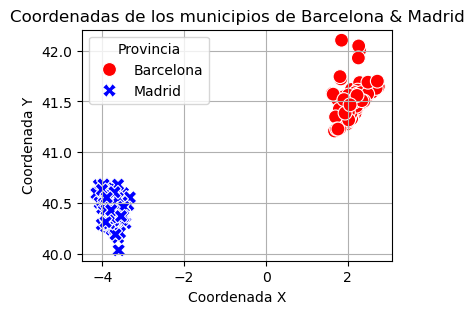

In [204]:
municipio_madrid = dataset.loc[dataset["Provincia"] == "Madrid"]
municipio_barcelona = dataset.loc[dataset["Provincia"] == "Barcelona"]
madrid_barcelona = pd.concat([municipio_barcelona, municipio_madrid], ignore_index=True)

plt.figure(figsize=(4,3))
sns.scatterplot(x="X", y="Y", data=madrid_barcelona, hue="Provincia", style="Provincia", palette={"Madrid": "blue", "Barcelona": "red"}, s=100)
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.title("Coordenadas de los municipios de Barcelona & Madrid")
plt.legend(title ="Provincia")
plt.grid(True)
plt.show()